# Assignment 4: Simulate Your Income
Xiuyuan Zhang

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import scipy.stats as stats

## Problem 1
First, I define a function that simulate the income given a dictionary that provides parameters for the simulation. 

In [135]:
def simulate_income(p):
    '''
    Simulate income
    
    Input: p: a dictionary
           p = {'sigma': 0.1,        #standard deviation
                'rho': 0.2,          #persistence
                'gamma': 0.03,       #long-run growth rate for annual salary
                'income_0': 80000,   #average initial income
                't_0': 2019,         #starting year
                't_n': 2058,         #ending year
                'num_draws': 10000,  #number of simulations
                'mean': 0            #mean
                }         
    
    Returns: income matrix
    
    '''
    np.random.seed(524)
    
    yrs_working = p['t_n'] - p['t_0'] + 1
    income_errors = np.random.normal(p['mean'], p['sigma'], (p['num_draws'], yrs_working))
    income_matrix = np.zeros((p['num_draws'], yrs_working))
    income_matrix[:, 0] = np.exp(np.log(p['income_0']) + income_errors[:, 0])

    for row in range(p['num_draws']):
        for yr in range(1, yrs_working):
            income_matrix[row, yr] = np.exp((1 - p['rho'])*(np.log(p['income_0'])+ p['gamma']*yr)\
                                    + p['rho']*np.log(income_matrix[row, yr - 1])\
                                    + income_errors[row,yr])
    
    
    return income_matrix



Then, I create a dictionary that contains parameters for the simulation in accordance to the assignemnt prompt.

In [136]:
p = {'sigma': 0.1,        #standard deviation
    'rho': 0.2,          #persistence
    'gamma': 0.03,       #long-run growth rate for annual salary
    'income_0': 80000,   #average initial income
    't_0': 2019,         #starting year
    't_n': 2058,         #ending year
    'num_draws': 10000,   #number of simulations
    'mean': 0            #mean
    }

Once the dictionary is created, I can use the simulate_income function to simulate an income matrix.

In [137]:
income_matrix = simulate_income(p)

Finally, I plot the simulation using matplotlib.

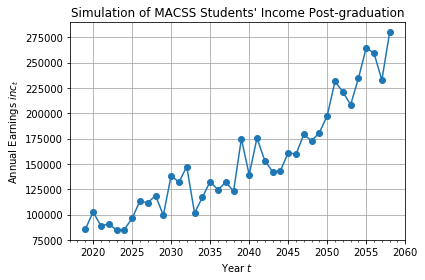

In [138]:
tvec = np.linspace(p['t_0'], p['t_n'], p['t_n'] - p['t_0'] + 1)

fig, ax = plt.subplots()
plt.plot(tvec,income_matrix[1,:], '-o')
plt.grid(b = True, which = 'major', color = '0.65', linestyle = '-')
minorlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorlocator)
plt.title("Simulation of MACSS Students' Income Post-graduation")
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Earnings $inc_{t}$')

plt.show()

## Problem 2

I first create a new matrix that contains incomes of all simulations from year 2019 based on the orginal income_matrix. Then, I calculate its mean and standard deviation.

In [139]:
incomes_2019 = income_matrix[:, 0]
mean = np.mean(incomes_2019)
sd = np.std(incomes_2019)

Next, I plot a histogram using matplotlib.hist based on the incomes_2019 matrix and plot a fitted normal distrubtion curve.

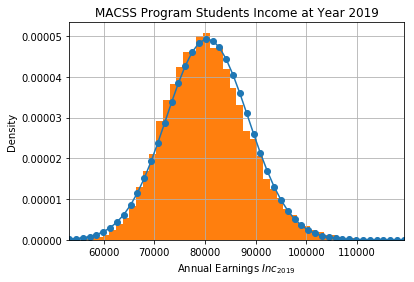

In [153]:
x = np.linspace(min(incomes_2019), max(incomes_2019), 50)
fit = stats.norm.pdf(x, mean, sd)
plt.plot(x, fit, '-o')
plt.hist(incomes_2019, bins = 50, normed = True)
plt.xlim(min(incomes_2019), max(incomes_2019))

plt.title('MACSS Program Students Income at Year 2019')
plt.ylabel('Density')
plt.xlabel('Annual Earnings $Inc_{2019}$')
plt.grid(True)

plt.show()

Finally, I calculate the percentage of students whose income are 1) above 100,000 or 2) below 70,000. I also evaluate whether this graph is normally distributed or not.

In [141]:
percentage_above_100000 = (np.mean(incomes_2019 > 100000)) 
percentage_below_70000 = (np.mean(incomes_2019 < 70000))

print("{:.2f}% of MACSS students have an annual income more than 100000 at year 2019, \
and {:.2f}% of students have an annual income less than 70000 at the same year, \
according to this simulation.".format(percentage_above_100000 * 100, percentage_below_70000 * 100))

1.45% of MACSS students have an annual income more than 100000 at year 2019, and 8.89% of students have an annual income less than 70000 at the same year, according to this simulation.


Looking at the histogram and its fitted normal distribution, it appears that the income of students at year 2019 is normally distributed and have a bell-curved shape.

## Problem 3

I first create a new matrix that contains the debt information and in accordance with the number of simulations.

I then update the debt_matrix with information on the years students work after graduation (40 years) and the percentage of their annual income that they use to pay debt (0.1).

In [142]:
debt_matrix = np.zeros(p['num_draws'])
debt = 95000
rate = 0.1
yrs_working = p['t_n'] - p['t_0'] + 1

for s in range(p['num_draws']):
    current_debt = debt
    for t in range(yrs_working):
        current_debt -= income_matrix[s, t] * rate
        if current_debt <= 0:
            debt_matrix[s] = p['t_0'] + t
            break

Next, I plot the histogram of the years that students pay of their total debts.

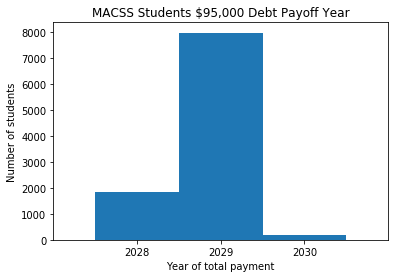

In [143]:
bins = np.arange(min(debt_matrix) - 0.5, max(debt_matrix) + 1 )

plt.hist(debt_matrix, bins)

plt.title('MACSS Students $95,000 Debt Payoff Year')
plt.xlabel(r'Year of total payment')
plt.ylabel(r'Number of students')
plt.xticks(np.arange(debt_matrix.min(), debt_matrix.max() + 1))
plt.xlim([np.min(debt_matrix) - 1, np.max(debt_matrix) + 1])

plt.show()

Finally, I calculate how many students are able to pay off their total debt within 10 or fewer years.

In [144]:
percentage_10yrs = np.mean(debt_matrix < 2029)
print('{}% of students are able to pay off their total debt within 10 or fewer years.'.format(percentage_10yrs * 100))

18.42% of students are able to pay off their total debt within 10 or fewer years.


## Problem 4

I first create a new dictionary with the updated standard deviation and intial income.

I then use simulate_income function with the new dictionary to create an income matrix 

In [145]:
q = {'sigma': 0.15,        #standard deviation
    'rho': 0.2,          #persistence
    'gamma': 0.03,       #long-run growth rate for annual salary
    'income_0': 85000,   #average initial income
    't_0': 2019,         #starting year
    't_n': 2058,         #ending year
    'num_draws': 10000,   #number of simulations
    'mean': 0            #mean
    }

In [146]:
incomes_matrix_2 = simulate_income(q)

Next, I create a new matrix that contains the debt information and in accordance with the number of simulations.

After that, I update the debt_matrix with information on the years students work after graduation (40 years) and the percentage of their annual income that they use to pay debt (0.1).

In [147]:
new_debt_matrix = incomes_matrix_2[:, 0]
debt = 95000
rate = 0.1
yrs_working = p['t_n'] - p['t_0'] + 1

for s in range(p['num_draws']):
    current_debt = debt
    for t in range(yrs_working):
        current_debt -= incomes_matrix_2[s, t] * rate
        if current_debt <= 0:
            new_debt_matrix[s] = p['t_0'] + t
            break


Next, I plot the histogram of the years that students pay of their total debts.

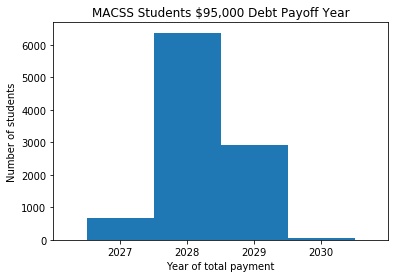

In [148]:
bins = np.arange(min(new_debt_matrix) - 0.5, max(new_debt_matrix) + 1 )

plt.hist(new_debt_matrix, bins)

plt.title('MACSS Students $95,000 Debt Payoff Year')
plt.xlabel(r'Year of total payment')
plt.ylabel(r'Number of students')
plt.xticks(np.arange(new_debt_matrix.min(), new_debt_matrix.max() + 1))
plt.xlim([np.min(new_debt_matrix) - 1, np.max(new_debt_matrix) + 1])

plt.show()

Finally, I calculate how many students are able to pay off their total debt within 10 or fewer years.

In [149]:
percentage_10yrs = np.mean(new_debt_matrix < 2029)
print('{:.2f}% of students are able to pay off their total debt within 10 or fewer years.'.format(percentage_10yrs * 100))

70.51% of students are able to pay off their total debt within 10 or fewer years.
